# Loan Defaulter Prediction

In [1]:
# importing basic libraries
# numpy # pandas # matplot #seaborn 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("cs-training.csv")

In [3]:
data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Description of the Dataset


| Column Name                     | Description                                                                               |
| ------------------------------- |:-----------------------------------------------------------------------------------------:|  
| SeriousDlqin2yrs                | In the dataset, this particular attribute indicates whether the borrower has experienced any past dues until 90 days in the previous 2 years.                                |
| Amount.Funded.By.Investors      | The amount (in dollars) loaned to the individual.                                         | 
| RevolvingUtilizationOfUnsecuredLines                   | This attribute indicates the credit card limits of the borrower after excluding any current loan debt and real estate.                                                                |
| Age                     | This attribute is self-explanatory. It indicates the borrower's age.                                               |
| NumberOfTime30-59DaysPastDueNotWorse                    | The number of this attribute indicates the number of times borrowers have paid their EMIs late but have paid them 30 days after the due date or 59 days before the due date.                                       |
| DebtRatio            | This is also a self-explanatory attribute, but we will try and understand it better with an example.                  |
| Monthly.Income                  | This attribute contains the value of the monthly income of borrowers.                                         |
| NumberOfOpenCreditLinesAndLoans                      |This attribute indicates how many times a borrower has paid their dues 90 days after the due date of their EMIs.                                                                                                                 |
| NumberRealEstateLoansOrLines               | This attribute indicates the number of loans the borrower holds for their real estate or the number of home loans a borrower has         
|NumberOfTime60-89DaysPastDueNotWorse| This attribute indicates how many times borrowers have paid their EMIs late but paid them 60 days after their due date or 89 days before their due date.                                         |
| NumberOfDependents  |  This attribute is self-explanatory as well. It indicates the number of dependent family members the borrowers have. The dependent count is excluding the borrower.                |

In [5]:
data2=pd.read_csv("cs-test.csv")

In [6]:
data2.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
training_data = data.drop('Unnamed: 0', axis = 1,inplace=True)

In [8]:
# After droping the "Unnamed column"
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(data.columns)):
    cleancolumn.append(data.columns[i].replace('-', '').lower())
data.columns = cleancolumn

In [10]:
data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:
data.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

In [12]:
data.shape

(150000, 11)

C:\Users\nehak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


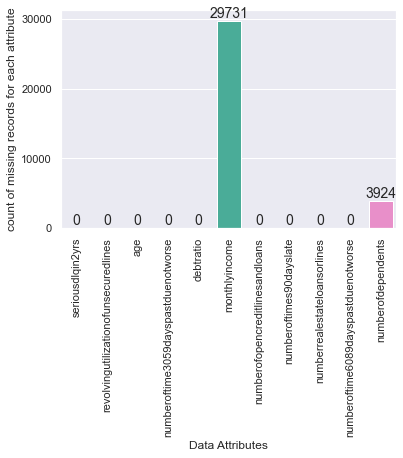

In [13]:
# Graphical representation of the missing values.
x = data.columns
y = data.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [14]:
# fill the missing value
training_data = data.fillna((data.mean()))
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [15]:
training_data.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

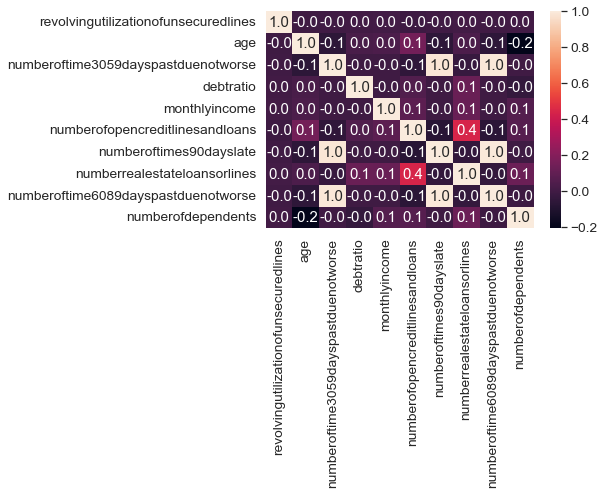

In [16]:
# Finding the Correlation
# Check out the relation among different variables.
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(training_data[training_data.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

In [17]:
data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
data.columns[1:]

Index(['revolvingutilizationofunsecuredlines', 'age',
       'numberoftime3059dayspastduenotworse', 'debtratio', 'monthlyincome',
       'numberofopencreditlinesandloans', 'numberoftimes90dayslate',
       'numberrealestateloansorlines', 'numberoftime6089dayspastduenotworse',
       'numberofdependents'],
      dtype='object')

In [20]:
# treating the nan values 
np.where(np.isnan(data))

(array([     6,      8,      8, ..., 149984, 149992, 149997], dtype=int64),
 array([ 5,  5, 10, ...,  5,  5,  5], dtype=int64))

In [21]:
data.fillna(data.mean(),inplace=True)

In [22]:
# Lets again check for the nan values.
np.where(np.isnan(data))
# no missing values

(array([], dtype=int64), array([], dtype=int64))

In [23]:
X = data.drop('seriousdlqin2yrs', axis=1)
y = data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 100, random_state=0, n_jobs = -1)
# we try to 100 estimator as i am training it on my lil CPU.So let's reduce the computation time.
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.191850
 2) age                            0.178629
 3) numberoftime3059dayspastduenotworse 0.145691
 4) debtratio                      0.127786
 5) monthlyincome                  0.093372
 6) numberofopencreditlinesandloans 0.088704
 7) numberoftimes90dayslate        0.050238
 8) numberrealestateloansorlines   0.045730
 9) numberoftime6089dayspastduenotworse 0.043924
10) numberofdependents             0.034076


The result could be more better if you go from form estimator like try for '10000' . Whole process results better accuracy.

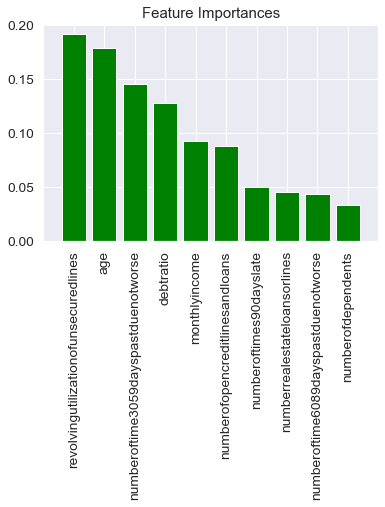

In [24]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## Train and build baseline model.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [26]:
X = data.drop('seriousdlqin2yrs', axis=1)
y = data.seriousdlqin2yrs

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
# Train & test on kNN
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [29]:
knMod.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
knMod.score(X_test, y_test)

0.9324533333333334

In [31]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [32]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5767564806229926

ROC_AUC score is very poor so let's train it with different model.

### Logistric regression

In [33]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [34]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear',
                   verbose=2)

In [35]:
glmMod.score(X_test, y_test)

0.9341866666666667

In [36]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [37]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.696772099109005

Produced better result compare to the knn one .

###  AdaBoostClassifier

In [38]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [39]:
adaMod.fit(X_train.values, y_train.values)

AdaBoostClassifier(n_estimators=200)

In [40]:
adaMod.score(X_test.values, y_test.values)

0.9360266666666667

In [41]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [42]:
roc_auc_score(y_test.values,test_labels , average='macro', sample_weight=None)

0.8578894012367795

### Testing on Real Test Dataset

In [43]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv("cs-test.csv").drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [44]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [45]:
test_data.head()

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [46]:
test_data.shape

(101503, 10)

In [47]:
# Lookout for null values.
test_data.isnull().sum()

revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [48]:
# Look out for nan values.
np.where(np.isnan(test_data))

(array([], dtype=int64), array([], dtype=int64))

In [49]:
test_labels_adaMod = adaMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_adaMod))

101503


In [50]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_adaMod})

In [51]:
output.head()

,ID,probability
0,0,0.496698
1,1,0.497112
2,2,0.495006
3,3,0.496836
4,4,0.497360


In [52]:
len(output[output['probability']>.5])

2651

### How to improve model accuracy

- We haven't used cross-validation techniques extensively in order to check the overfitting issue. For that we can use "  sklearn cross val method"
- We need to tune these hyperparameters in such a way that we can increase the accuracy of the classifier. There are various hyperparameter-tuning techniques that we need to use.

### Save the model using pickle

In [53]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(adaMod, open(filename, 'wb'))

In [54]:
# load the pickled model.
loaded_model = pickle.load(open('finalized_model.pkl', 'rb'))
result = loaded_model.predict_proba(np.array(test_data.values))
print(result)

[[0.50330175 0.49669825]
 [0.50288842 0.49711158]
 [0.5049939  0.4950061 ]
 ...
 [0.50616292 0.49383708]
 [0.50306198 0.49693802]
 [0.50391975 0.49608025]]


 ####  In the output list  you can see there are two probabilities : first one is probability of zero and second one is probability of one.

In [55]:
# lets produce our output in the form of binary.
result2=loaded_model.predict(test_data)
print(result2[:500])

C:\Users\nehak\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [56]:
test_data.head(5)

,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [57]:
result1=loaded_model.predict([[0.06,38,2,0.046878,5080.0,2,0,3,0,2]])
print(result1)

[0]


By the values we have given, we can see the model tells us that the person cannot be a defaulter. 